## Imports

In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score, roc_curve

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

## Major League

## Pitchers

In [4]:
MLB_Pitch = pd.read_csv('/Users/kellyjara/Desktop/Project3/Data/MLB PItchers.csv')
MLB_Pitch

,last_name,first_name,player_id,year,p_game,p_formatted_ip,pa,ab,hit,home_run,...,walk,p_earned_run,p_run,p_save,p_blown_save,p_win,p_loss,p_balk,p_era,Unnamed: 20
0,Colon,Bartolo,112526,2015,33,194.2,815,771,217,25,...,24,90,94,0,0,14,13,0,4.16,NaN
1,Burnett,A.J.,150359,2015,26,164.0,699,633,174,11,...,49,58,64,0,0,9,7,1,3.18,NaN
2,Hudson,Tim,218596,2015,24,123.2,525,476,134,13,...,37,61,62,0,0,8,9,0,4.44,NaN
3,Buehrle,Mark,279824,2015,32,198.2,827,768,214,22,...,33,84,100,0,0,15,8,0,3.81,NaN
4,Sabathia,CC,282332,2015,29,167.1,726,659,188,28,...,50,88,92,0,0,6,10,1,4.73,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1008,Bradish,Kyle,680694,2023,12,60.0,251,230,60,6,...,16,26,27,0,0,2,3,0,3.90,NaN
1009,Waldichuk,Ken,686610,2023,16,59.2,291,244,77,14,...,39,44,48,1,0,1,5,0,6.64,NaN
1010,Brown,Hunter,686613,2023,14,81.0,332,299,71,8,...,28,34,38,0,0,6,4,0,3.78,NaN
1011,Varland,Louie,686973,2023,10,56.0,241,222,60,14,...,16,33,33,0,0,3,3,0,5.30,NaN


In [5]:
MLB_Pitch.drop(columns = 'Unnamed: 20', inplace = True)

In [6]:
MLB_Pitch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1013 entries, 0 to 1012
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   last_name       1013 non-null   object 
 1    first_name     1013 non-null   object 
 2   player_id       1013 non-null   int64  
 3   year            1013 non-null   int64  
 4   p_game          1013 non-null   int64  
 5   p_formatted_ip  1013 non-null   float64
 6   pa              1013 non-null   int64  
 7   ab              1013 non-null   int64  
 8   hit             1013 non-null   int64  
 9   home_run        1013 non-null   int64  
 10  strikeout       1013 non-null   int64  
 11  walk            1013 non-null   int64  
 12  p_earned_run    1013 non-null   int64  
 13  p_run           1013 non-null   int64  
 14  p_save          1013 non-null   int64  
 15  p_blown_save    1013 non-null   int64  
 16  p_win           1013 non-null   int64  
 17  p_loss          1013 non-null   i

In [7]:
#creating column specifying players are in the major league

In [8]:
MLB_Pitch['League'] = 'Major'

In [9]:
MLB_Pitch.head()

,last_name,first_name,player_id,year,p_game,p_formatted_ip,pa,ab,hit,home_run,...,walk,p_earned_run,p_run,p_save,p_blown_save,p_win,p_loss,p_balk,p_era,League
0,Colon,Bartolo,112526,2015,33,194.2,815,771,217,25,...,24,90,94,0,0,14,13,0,4.16,Major
1,Burnett,A.J.,150359,2015,26,164.0,699,633,174,11,...,49,58,64,0,0,9,7,1,3.18,Major
2,Hudson,Tim,218596,2015,24,123.2,525,476,134,13,...,37,61,62,0,0,8,9,0,4.44,Major
3,Buehrle,Mark,279824,2015,32,198.2,827,768,214,22,...,33,84,100,0,0,15,8,0,3.81,Major
4,Sabathia,CC,282332,2015,29,167.1,726,659,188,28,...,50,88,92,0,0,6,10,1,4.73,Major


In [10]:
MLB_Pitch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1013 entries, 0 to 1012
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   last_name       1013 non-null   object 
 1    first_name     1013 non-null   object 
 2   player_id       1013 non-null   int64  
 3   year            1013 non-null   int64  
 4   p_game          1013 non-null   int64  
 5   p_formatted_ip  1013 non-null   float64
 6   pa              1013 non-null   int64  
 7   ab              1013 non-null   int64  
 8   hit             1013 non-null   int64  
 9   home_run        1013 non-null   int64  
 10  strikeout       1013 non-null   int64  
 11  walk            1013 non-null   int64  
 12  p_earned_run    1013 non-null   int64  
 13  p_run           1013 non-null   int64  
 14  p_save          1013 non-null   int64  
 15  p_blown_save    1013 non-null   int64  
 16  p_win           1013 non-null   int64  
 17  p_loss          1013 non-null   i

In [11]:
# combining name columns

In [12]:
MLB_Pitch['name'] = MLB_Pitch[' first_name'].map(str) + ' ' + MLB_Pitch['last_name'].map(str)
MLB_Pitch.head()

,last_name,first_name,player_id,year,p_game,p_formatted_ip,pa,ab,hit,home_run,...,p_earned_run,p_run,p_save,p_blown_save,p_win,p_loss,p_balk,p_era,League,name
0,Colon,Bartolo,112526,2015,33,194.2,815,771,217,25,...,90,94,0,0,14,13,0,4.16,Major,Bartolo Colon
1,Burnett,A.J.,150359,2015,26,164.0,699,633,174,11,...,58,64,0,0,9,7,1,3.18,Major,A.J. Burnett
2,Hudson,Tim,218596,2015,24,123.2,525,476,134,13,...,61,62,0,0,8,9,0,4.44,Major,Tim Hudson
3,Buehrle,Mark,279824,2015,32,198.2,827,768,214,22,...,84,100,0,0,15,8,0,3.81,Major,Mark Buehrle
4,Sabathia,CC,282332,2015,29,167.1,726,659,188,28,...,88,92,0,0,6,10,1,4.73,Major,CC Sabathia


In [13]:
#creating WHIP column

In [14]:
MLB_Pitch['WHIP'] = (MLB_Pitch['hit'] + MLB_Pitch['walk']) / MLB_Pitch['p_formatted_ip']

In [15]:
# Creating catergorical column based on WHIP values

In [16]:
def whip_ranks(x):
    if x < 1.20:
        return 'Above Average'
    elif x > 1.40:
        return 'Below Average'
    else: 
        return 'Average'
    
MLB_Pitch['WHIP Ranks'] = MLB_Pitch['WHIP'].apply(whip_ranks)

In [17]:
MLB_Pitch['WHIP Ranks'].value_counts()

Average          433
Above Average    342
Below Average    238
Name: WHIP Ranks, dtype: int64

In [18]:
MLB_Pitch["WHIP_Rank"] = MLB_Pitch["WHIP Ranks"].astype('category')
categories = ["Average", "Above Average","Below Average"]
MLB_Pitch["WHIP_Rank"] = MLB_Pitch["WHIP_Rank"].cat.reorder_categories(categories)
MLB_Pitch["WHIP_Rank"] = MLB_Pitch["WHIP_Rank"].cat.codes
MLB_Pitch["WHIP_Rank"].value_counts()

0    433
1    342
2    238
Name: WHIP_Rank, dtype: int64

In [19]:
# Creating categorical column based on ERA values

In [20]:
def era_ranks(x):
    if x < 3.40:
        return 'Above Average'
    elif x > 4.00:
        return 'Below Average'
    else: 
        return 'Average'
    
MLB_Pitch['ERA Ranks'] = MLB_Pitch['p_era'].apply(era_ranks)

In [21]:
MLB_Pitch['ERA Ranks'].value_counts()

Below Average    511
Above Average    264
Average          238
Name: ERA Ranks, dtype: int64

In [22]:
MLB_Pitch["ERA_Rank"] = MLB_Pitch["ERA Ranks"].astype('category')
categories = ["Below Average","Above Average", "Average"]
MLB_Pitch["ERA_Rank"] = MLB_Pitch["ERA_Rank"].cat.reorder_categories(categories)
MLB_Pitch["ERA_Rank"] = MLB_Pitch["ERA_Rank"].cat.codes
MLB_Pitch["ERA_Rank"].value_counts()

0    511
1    264
2    238
Name: ERA_Rank, dtype: int64

In [23]:
MLB_Pitch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1013 entries, 0 to 1012
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   last_name       1013 non-null   object 
 1    first_name     1013 non-null   object 
 2   player_id       1013 non-null   int64  
 3   year            1013 non-null   int64  
 4   p_game          1013 non-null   int64  
 5   p_formatted_ip  1013 non-null   float64
 6   pa              1013 non-null   int64  
 7   ab              1013 non-null   int64  
 8   hit             1013 non-null   int64  
 9   home_run        1013 non-null   int64  
 10  strikeout       1013 non-null   int64  
 11  walk            1013 non-null   int64  
 12  p_earned_run    1013 non-null   int64  
 13  p_run           1013 non-null   int64  
 14  p_save          1013 non-null   int64  
 15  p_blown_save    1013 non-null   int64  
 16  p_win           1013 non-null   int64  
 17  p_loss          1013 non-null   i

### MLB PreProcessing

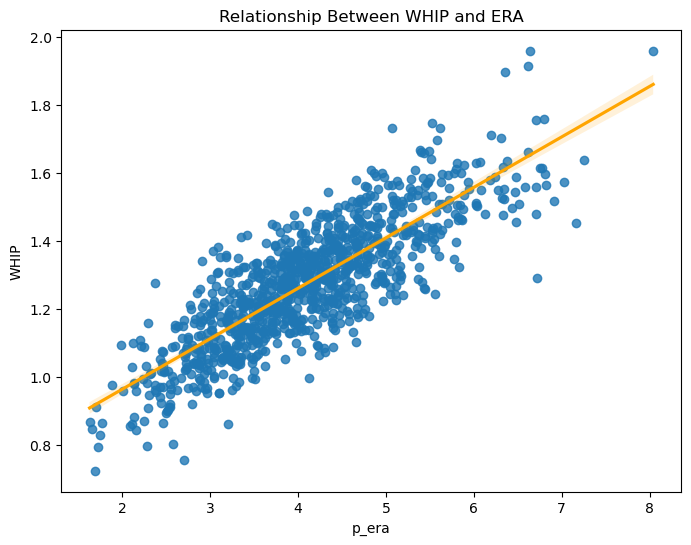

In [24]:
plt.figure(figsize=(8, 6))
sns.regplot(x='p_era', y='WHIP', data=MLB_Pitch, line_kws={"color":"orange"})
plt.title('Relationship Between WHIP and ERA')
plt.show()

In [25]:
MLB_Feats = ['p_game', 'p_formatted_ip', 'pa', 'ab', 'hit', 'home_run','strikeout',
            'walk','p_earned_run','p_run','p_save','p_blown_save','p_win','p_loss',
            'p_balk','p_era']

In [26]:
X = MLB_Pitch[MLB_Feats]
y = MLB_Pitch['WHIP_Rank']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)

In [27]:
scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [28]:
y_train.value_counts(normalize=True)

0    0.417489
1    0.335684
2    0.246827
Name: WHIP_Rank, dtype: float64

In [29]:
y_test.value_counts(normalize=True)

0    0.450658
1    0.342105
2    0.207237
Name: WHIP_Rank, dtype: float64

In [30]:
MLB_Model = LogisticRegression(random_state=42)
MLB_Model.fit(X_train_scaled, y_train)
preds =MLB_Model.predict(X_test_scaled)

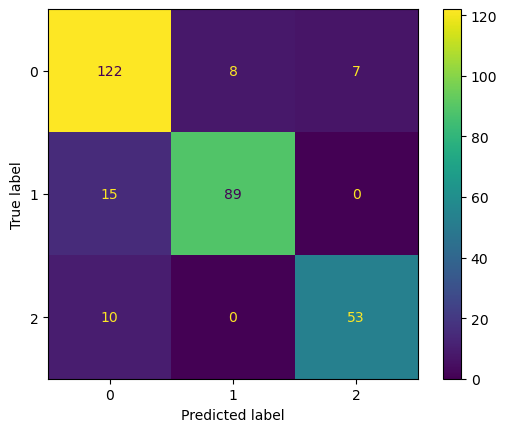

In [31]:
MLB_CM =confusion_matrix(y_test,preds);
ConfusionMatrixDisplay(MLB_CM).plot()

In [32]:
test_preds = MLB_Model.predict(X_test_scaled)

In [33]:
accuracy = accuracy_score(y_test, test_preds)
print(accuracy)
precision = precision_score(y_test, test_preds, average = 'weighted')
print(precision)
recall = recall_score(y_test, test_preds, average = 'weighted')
print(recall)
f1 = f1_score(y_test, test_preds, average = 'weighted')
print(f1)

0.868421052631579
0.8709650022515789
0.868421052631579
0.868738193310869


## Minor League

#### Minor League Pitchers

In [34]:
Min_Pitch = pd.read_csv('/Users/kellyjara/Desktop/Project3/Data/Minor League Pitchers.csv')
Min_Pitch

,Name,Team,Level,Age,W,L,ERA,G,GS,CG,...,R,ER,HR,BB,IBB,HBP,WP,BK,SO,PlayerId
0,Patrick Schuster,ARI,"AA,AAA",24-26,7,4,3.635762,134,0,0,...,64,61,8,63,1,10,12,1,145,10029
1,Keyvius Sampson,CIN,"A,AA,AAA,R",24-30,12,18,4.017426,74,44,0,...,123,111,18,138,1,8,14,1,245,10039
2,Ashur Tolliver,BAL,"A-,AA,AAA,R",27-29,5,3,3.751708,108,2,0,...,63,61,8,80,1,5,12,1,146,10044
3,Johnny Hellweg,MIL,"A+,AA,AAA",26-29,3,17,5.915731,54,22,0,...,99,78,10,85,0,21,21,2,87,10065
4,Ian Krol,DET,"A+,AAA,R",24-31,10,8,3.831683,177,2,0,...,95,86,18,98,3,13,17,1,234,10066
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5873,Tom de Blok,DET,"A,A-,A+",21-23,11,21,3.909502,64,51,0,...,139,128,26,93,0,11,11,2,234,sa971762
5874,Adrian Alcantara,KCR,"A,A+,AA,R",17-23,22,23,4.487738,94,59,1,...,209,183,48,147,1,28,39,11,375,sa974592
5875,Osvaldo Hernandez,SDP,"A,A-,A+,AA,R",19-24,22,23,3.777465,106,69,0,...,178,149,35,102,1,21,26,9,322,sa975541
5876,Parker Curry,LAD,"A,A+,AA,AAA",23-25,15,20,3.916560,97,28,0,...,130,113,33,75,0,2,22,1,280,sa977821


In [35]:
Min_Pitch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5878 entries, 0 to 5877
Data columns (total 27 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5878 non-null   object 
 1   Team      5875 non-null   object 
 2   Level     5878 non-null   object 
 3   Age       5878 non-null   object 
 4   W         5878 non-null   int64  
 5   L         5878 non-null   int64  
 6   ERA       5878 non-null   float64
 7   G         5878 non-null   int64  
 8   GS        5878 non-null   int64  
 9   CG        5878 non-null   int64  
 10  ShO       5878 non-null   int64  
 11  SV        5878 non-null   int64  
 12  BS        5878 non-null   int64  
 13  HLD       0 non-null      float64
 14  IP        5878 non-null   float64
 15  TBF       5878 non-null   int64  
 16  H         5878 non-null   int64  
 17  R         5878 non-null   int64  
 18  ER        5878 non-null   int64  
 19  HR        5878 non-null   int64  
 20  BB        5878 non-null   int6

In [36]:
#Creating column with total number of walks; intentional and unintentional

In [37]:
Min_Pitch['Total Walks'] = Min_Pitch['BB'] + Min_Pitch['IBB']

In [38]:
Min_Pitch.head()

,Name,Team,Level,Age,W,L,ERA,G,GS,CG,...,ER,HR,BB,IBB,HBP,WP,BK,SO,PlayerId,Total Walks
0,Patrick Schuster,ARI,"AA,AAA",24-26,7,4,3.635762,134,0,0,...,61,8,63,1,10,12,1,145,10029,64
1,Keyvius Sampson,CIN,"A,AA,AAA,R",24-30,12,18,4.017426,74,44,0,...,111,18,138,1,8,14,1,245,10039,139
2,Ashur Tolliver,BAL,"A-,AA,AAA,R",27-29,5,3,3.751708,108,2,0,...,61,8,80,1,5,12,1,146,10044,81
3,Johnny Hellweg,MIL,"A+,AA,AAA",26-29,3,17,5.915731,54,22,0,...,78,10,85,0,21,21,2,87,10065,85
4,Ian Krol,DET,"A+,AAA,R",24-31,10,8,3.831683,177,2,0,...,86,18,98,3,13,17,1,234,10066,101


In [39]:
# Creating WHIP column; Walks plus Hits per Innings Pitched

In [40]:
Min_Pitch['WHIP'] = (Min_Pitch['Total Walks'] + Min_Pitch['H']) / Min_Pitch['IP']

In [41]:
Min_Pitch.head()

,Name,Team,Level,Age,W,L,ERA,G,GS,CG,...,HR,BB,IBB,HBP,WP,BK,SO,PlayerId,Total Walks,WHIP
0,Patrick Schuster,ARI,"AA,AAA",24-26,7,4,3.635762,134,0,0,...,8,63,1,10,12,1,145,10029,64,1.410596
1,Keyvius Sampson,CIN,"A,AA,AAA,R",24-30,12,18,4.017426,74,44,0,...,18,138,1,8,14,1,245,10039,139,1.450443
2,Ashur Tolliver,BAL,"A-,AA,AAA,R",27-29,5,3,3.751708,108,2,0,...,8,80,1,5,12,1,146,10044,81,1.485284
3,Johnny Hellweg,MIL,"A+,AA,AAA",26-29,3,17,5.915731,54,22,0,...,10,85,0,21,21,2,87,10065,85,1.768190
4,Ian Krol,DET,"A+,AAA,R",24-31,10,8,3.831683,177,2,0,...,18,98,3,13,17,1,234,10066,101,1.495050


In [42]:
# removing columns 

In [43]:
Min_Pitch.drop(columns = 'HLD', inplace = True)
Min_Pitch.drop(columns = 'Level', inplace = True)
Min_Pitch.drop(columns = 'PlayerId', inplace = True)
Min_Pitch.drop(columns = 'Age', inplace = True)

In [44]:
Min_Pitch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5878 entries, 0 to 5877
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         5878 non-null   object 
 1   Team         5875 non-null   object 
 2   W            5878 non-null   int64  
 3   L            5878 non-null   int64  
 4   ERA          5878 non-null   float64
 5   G            5878 non-null   int64  
 6   GS           5878 non-null   int64  
 7   CG           5878 non-null   int64  
 8   ShO          5878 non-null   int64  
 9   SV           5878 non-null   int64  
 10  BS           5878 non-null   int64  
 11  IP           5878 non-null   float64
 12  TBF          5878 non-null   int64  
 13  H            5878 non-null   int64  
 14  R            5878 non-null   int64  
 15  ER           5878 non-null   int64  
 16  HR           5878 non-null   int64  
 17  BB           5878 non-null   int64  
 18  IBB          5878 non-null   int64  
 19  HBP   

In [45]:
# Adding New Column specifying the player is in the minor league

In [46]:
Min_Pitch['League'] = 'Minor'

In [47]:
Min_Pitch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5878 entries, 0 to 5877
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         5878 non-null   object 
 1   Team         5875 non-null   object 
 2   W            5878 non-null   int64  
 3   L            5878 non-null   int64  
 4   ERA          5878 non-null   float64
 5   G            5878 non-null   int64  
 6   GS           5878 non-null   int64  
 7   CG           5878 non-null   int64  
 8   ShO          5878 non-null   int64  
 9   SV           5878 non-null   int64  
 10  BS           5878 non-null   int64  
 11  IP           5878 non-null   float64
 12  TBF          5878 non-null   int64  
 13  H            5878 non-null   int64  
 14  R            5878 non-null   int64  
 15  ER           5878 non-null   int64  
 16  HR           5878 non-null   int64  
 17  BB           5878 non-null   int64  
 18  IBB          5878 non-null   int64  
 19  HBP   

In [48]:
Min_Pitch.head()

,Name,Team,W,L,ERA,G,GS,CG,ShO,SV,...,HR,BB,IBB,HBP,WP,BK,SO,Total Walks,WHIP,League
0,Patrick Schuster,ARI,7,4,3.635762,134,0,0,0,8,...,8,63,1,10,12,1,145,64,1.410596,Minor
1,Keyvius Sampson,CIN,12,18,4.017426,74,44,0,0,0,...,18,138,1,8,14,1,245,139,1.450443,Minor
2,Ashur Tolliver,BAL,5,3,3.751708,108,2,0,0,3,...,8,80,1,5,12,1,146,81,1.485284,Minor
3,Johnny Hellweg,MIL,3,17,5.915731,54,22,0,0,11,...,10,85,0,21,21,2,87,85,1.768190,Minor
4,Ian Krol,DET,10,8,3.831683,177,2,0,0,21,...,18,98,3,13,17,1,234,101,1.495050,Minor


### Creating a categorical column ranking WHIP for each player

In [49]:
def whip_ranks(x):
    if x < 1.20:
        return 'Above Average'
    elif x > 1.40:
        return 'Below Average'
    else: 
        return 'Average'
    
Min_Pitch['WHIP Ranks'] = Min_Pitch['WHIP'].apply(whip_ranks)

In [50]:
Min_Pitch['WHIP Ranks'].value_counts()

Average          2650
Below Average    2272
Above Average     956
Name: WHIP Ranks, dtype: int64

In [51]:
# Creating nominal column for WHIP Rank

In [52]:
Min_Pitch["WHIP_Rank"] = Min_Pitch["WHIP Ranks"].astype('category')
categories = ["Average","Below Average","Above Average"]
Min_Pitch["WHIP_Rank"] = Min_Pitch["WHIP_Rank"].cat.reorder_categories(categories)
Min_Pitch["WHIP_Rank"] = Min_Pitch["WHIP_Rank"].cat.codes
Min_Pitch["WHIP_Rank"].value_counts()

0    2650
1    2272
2     956
Name: WHIP_Rank, dtype: int64

### Creating a categorical column ranking ERA for each player

In [53]:
def era_ranks(x):
    if x < 3.40:
        return 'Above Average'
    elif x > 4.00:
        return 'Below Average'
    else: 
        return 'Average'
    
Min_Pitch['ERA Ranks'] = Min_Pitch['ERA'].apply(era_ranks)

In [54]:
Min_Pitch['ERA Ranks'].value_counts()

Below Average    2927
Average          1494
Above Average    1457
Name: ERA Ranks, dtype: int64

In [55]:
# Creating nominal column for ERA Rank

In [56]:
Min_Pitch["ERA_Rank"] = Min_Pitch["ERA Ranks"].astype('category')
categories = ["Below Average","Average","Above Average"]
Min_Pitch["ERA_Rank"] = Min_Pitch["ERA_Rank"].cat.reorder_categories(categories)
Min_Pitch["ERA_Rank"] = Min_Pitch["ERA_Rank"].cat.codes
Min_Pitch["ERA_Rank"].value_counts()

0    2927
1    1494
2    1457
Name: ERA_Rank, dtype: int64

In [57]:
Min_Pitch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5878 entries, 0 to 5877
Data columns (total 30 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         5878 non-null   object 
 1   Team         5875 non-null   object 
 2   W            5878 non-null   int64  
 3   L            5878 non-null   int64  
 4   ERA          5878 non-null   float64
 5   G            5878 non-null   int64  
 6   GS           5878 non-null   int64  
 7   CG           5878 non-null   int64  
 8   ShO          5878 non-null   int64  
 9   SV           5878 non-null   int64  
 10  BS           5878 non-null   int64  
 11  IP           5878 non-null   float64
 12  TBF          5878 non-null   int64  
 13  H            5878 non-null   int64  
 14  R            5878 non-null   int64  
 15  ER           5878 non-null   int64  
 16  HR           5878 non-null   int64  
 17  BB           5878 non-null   int64  
 18  IBB          5878 non-null   int64  
 19  HBP   

### Preprocessing Min League

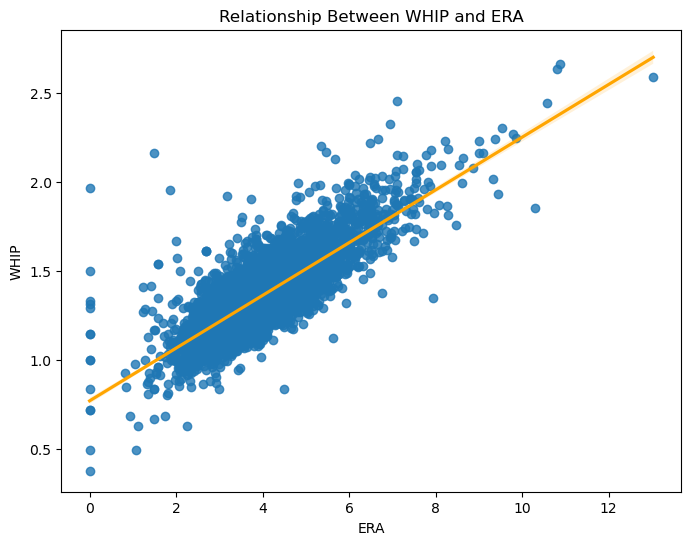

In [58]:
plt.figure(figsize=(8, 6))
sns.regplot(x='ERA', y='WHIP', data=Min_Pitch, line_kws={"color":"orange"})
plt.title('Relationship Between WHIP and ERA')
plt.show()

In [59]:
base_feats = ['W', 'L', 'G','GS','CG','ShO','SV','BS','IP',
              'TBF', 'H', 'R', 'BB', 'IBB', 'HBP', 'WP', 'BK', 'SO']

In [60]:
X = Min_Pitch[base_feats]
y = Min_Pitch['WHIP_Rank']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)

In [61]:
scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [62]:
y_train.value_counts(normalize=True)

0    0.452115
1    0.387214
2    0.160671
Name: WHIP_Rank, dtype: float64

In [63]:
y_test.value_counts(normalize=True)

0    0.447846
1    0.384921
2    0.167234
Name: WHIP_Rank, dtype: float64

### Logistic Regression Model - WHIP

In [64]:
Min_WHIP = LogisticRegression(random_state=42)
Min_WHIP.fit(X_train_scaled, y_train)
preds = Min_WHIP.predict(X_test_scaled)

/Users/kellyjara/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


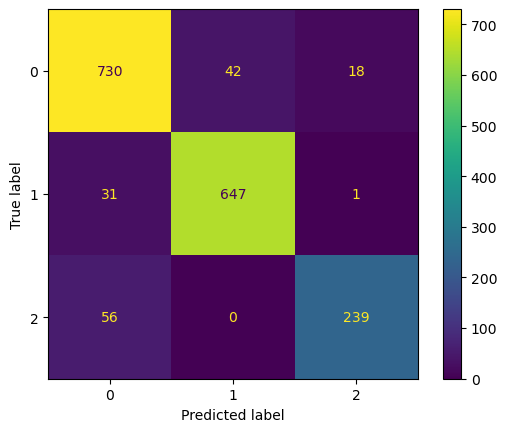

In [65]:
Min_Whip_CM =confusion_matrix(y_test,preds);
ConfusionMatrixDisplay(Min_Whip_CM).plot()

In [66]:
test_preds = Min_WHIP.predict(X_test_scaled)

In [67]:
accuracy = accuracy_score(y_test, test_preds)
print(accuracy)
precision = precision_score(y_test, test_preds, average = 'weighted')
print(precision)
recall = recall_score(y_test, test_preds, average = 'weighted')
print(recall)
f1 = f1_score(y_test, test_preds, average = 'weighted')
print(f1)

0.9160997732426304
0.9165305702366048
0.9160997732426304
0.9155308027294188


### Logistic Regression Model - ERA

In [68]:
X = Min_Pitch[base_feats]
y = Min_Pitch['ERA_Rank']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)

In [69]:
scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [70]:
y_train.value_counts(normalize = True)

0    0.501458
1    0.253038
2    0.245503
Name: ERA_Rank, dtype: float64

In [71]:
y_test.value_counts(normalize = True)

0    0.489796
1    0.256803
2    0.253401
Name: ERA_Rank, dtype: float64

In [72]:
Min_ERA = LogisticRegression(random_state=42)
Min_ERA.fit(X_train_scaled, y_train)
preds =Min_ERA.predict(X_test_scaled)

/Users/kellyjara/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


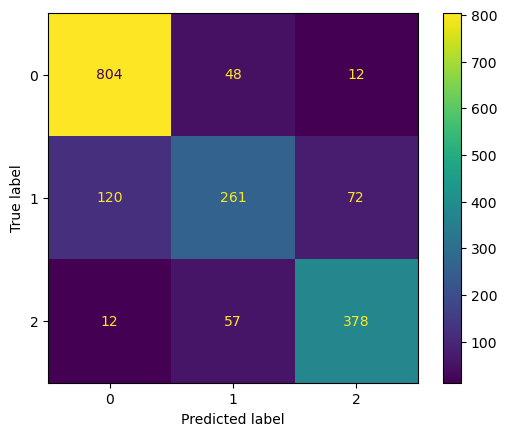

In [73]:
Min_ERA_CM =confusion_matrix(y_test,preds);
ConfusionMatrixDisplay(Min_ERA_CM).plot()

In [74]:
test_preds = Min_ERA.predict(X_test_scaled)

In [75]:
accuracy = accuracy_score(y_test, test_preds)
print(accuracy)
precision = precision_score(y_test, test_preds, average = 'weighted')
print(precision)
recall = recall_score(y_test, test_preds, average = 'weighted')
print(recall)
f1 = f1_score(y_test, test_preds, average = 'weighted')
print(f1)

0.8180272108843537
0.8111803302084333
0.8180272108843537
0.811977126396201
